#### Cluster Analysis

Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables that they are described by.

Observations in a dataset can be divided into different groups and sometimes this is very useful. It is often used as preliminary step to all kinds of analysis. It is a useful technique for expolring and identifying patterns in a data. It is a great starting point for data scientists who do not know whwre to start and what to expect.

The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters.

#### Some examples of clusters

1. Market Segmentation: 

In retail chain that sells clothing whose marketting campaign has been disastrous in the past few years. You are appointed as a data scientist and the firm gives you all the data you need to work with and asked to create the next marketting campaign. You will first identify the target customers using cluster analysis. The result shows the young who spend a lot and those who spend a little bit and middle-aged who spend a lot and those who spend a little bit. You should aim your marketting at those middle-aged who spend a lot.

2. Image Segmentation: Each color in a photo is a different cluster.

#### Classification vs Clustering
Linear and Logistic Regression and Regression and Classification are bot supervised learning.

Supervised learning - labelled data, inputs and correct values for outputs. Model(Inputs) -> Outputs -> Correct values for outputs.

In clustering, we dont use labels (unsupervised learning)

##### Classification

Classification is a typical example of supervised learning.

It is used whenever we have input data and the desired correct outcomes (targets). We train our data to find the patterns in the inputs that lead to the targets.

With classification we essentially need to know the correct class of each of the observations in our data, in order to apply the algorithm.

A logistic regression is a typical example of classification.

In classification, we predict an output category given input data.

##### Clustering

Cluster analysis is a typical example of unsupervised learning.

It is used whenever we have input data but have no clue what the correct outcomes are.

Clustering is about grouping data points together based on similarities among them and difference from others.

#### Maths Prerequistes

There are two prerequisites required to understand the clustering technique

1. Measure the distance between two data points: The most intuitive way to measure the distance is by drawing a line between (Euclidean distance).
When performing clustering, we will be finding the distance between clusters.

2. Define the term Centroid: Centroid is the mean position of a group of points aka Centre of mass.

#### K-means clustering

How K-Means work:
1. Choose the number of clusters: K stands for the number of clusters we are trying to identify.
2. Specify the cluster seeds: A seed is a starting centroid. It is chosen at random or specified by the scientist based on prior knowledge about the data.
3. Assign each point to a centroid: Done based on proximity. 
4. Adjust the centroids

#### K-means clustering - pros and cons

#### PROS
• Simple to implement: so many people can use it.
• Computationally efficient: it takes considerably less time than any hierarchical clustering model.
• Widely used: popular, therefore, in demand.
• Always yields a result: also a con as it may be deceiving

#### CONS
• We need to pick K: often, we don’t know how many clusters we need.
• Sensitive to initialization: but we can use methods such as kmeans++ to determine the seeds.
• Sensitive to outliers: by far the biggest downside of k-means.
• Produces spherical solutions: thus, not as generalizable

#### Types of clustering

##### Flat

With flat methods there is no hierarchy, but rather the number of clusters are chosen prior to clustering. Flat methods have been developed because hierarchical clustering is much slower and computationally expensive.
Nowadays, flat methods are preferred because of the volume of
data we typically try to cluster.

##### Hierarchical

Historically, lustering was developed first. An example of hierarchical clustering with hierarchy is taxonomy of the animal kingdom. It is superior to flat clustering in the fact that it explores (contains) all solutions.

The hierarchical clustering is further sub-divided into
Divisive (top-down) Clustering: With divisive clustering we start from a situation where all observations are in the same cluster, e.g. from the dinosaurs. Then we split this big cluster into 2 smaller ones. Then we continue with 3, 4, 5, and so on, until each observation is its separate cluster.

Agglomerative (bottom-up) Clustering: To find the best split, we must explore all possibilities at each step. When it comes to agglomerative clustering, the approach is bottom up. We start from different dog and cat breeds, cluster them into dogs and cats respectively, and then we continue pairing up species, until we reach the animal cluster. To find the combination of observations into a- cluster, we must explore all possibilities.

### A simple example of clustering

#### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

#### Load the data

In [2]:
data = pd.read_csv('C:\\Users\\AFC 2\\Documents\\Data Science Files\\Jupyter notebooks for Data Science\\3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

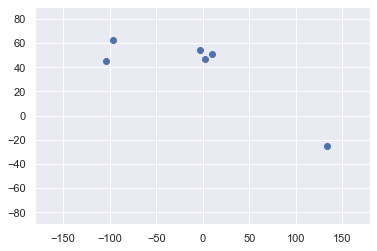

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

#### Select the Features

In [5]:
x = data.iloc[:, 1:3] #iloc slices the dataframe

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### Clustering

In [7]:
# declaring a variable called KMeans
kmeans = KMeans(3) #the value in bracket is the number of clusters we want to produce

In [8]:
kmeans.fit(x)
#This code will apply k-means clustering with 2 clusters to the input data from X

KMeans(n_clusters=3)

#### Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

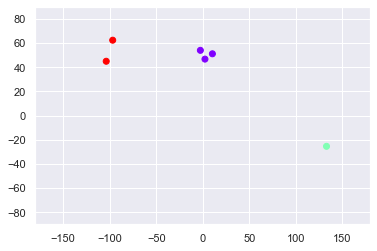

In [11]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

In matplotlib, we can set the color to be determined by a variable (cluster) 

We changed the kmeans = Kmeans to 3,and ran the code again from kmeans.

#### Map the data

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [13]:
x = data_mapped.iloc[:,3:4]

In [14]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### Clustering

In [20]:
kmeans = KMeans(2)

In [21]:
kmeans.fit(x)

KMeans(n_clusters=2)

#### Clustering results

In [22]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 0, 1])

In [23]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


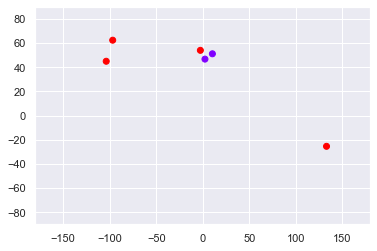

In [24]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### How to choose the number of clusters

The criterion for selecting number of clusters is the Elbow Method. 

In KMeans, minimizing the distance between clusters is same as maximizing the distance between clusters.